In [ ]:
import pandas as pd
import numpy as np
customer_data=pd.read_csv('Customer_Information.csv')
customer_data.head()

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids
0,ED9336,Ira,Chopra,Mumbay,Female,29,ira901@example.com
1,MV8927,Aditya,Iyer,Delhii,Male,57,aditya518@example.com
2,LX6917,Saanvi,Reddy,Banglore,Female,42,saanvi372@example.com
3,VU7300,Ira,Reddy,Hyderabad,Female,64,ira431@example.com
4,NR2536,Saanvi,Mehra,Ahmedabad,Female,63,mehra743@example.com


Pre - Processing of Customer information

In [ ]:
customer_data.shape

(56, 7)

In [ ]:
customer_data['Customer ID']=customer_data['Customer ID'].replace(".",np.nan)
customer_data.head(25)

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids
0,ED9336,Ira,Chopra,Mumbay,Female,29,ira901@example.com
1,MV8927,Aditya,Iyer,Delhii,Male,57,aditya518@example.com
2,LX6917,Saanvi,Reddy,Banglore,Female,42,saanvi372@example.com
3,VU7300,Ira,Reddy,Hyderabad,Female,64,ira431@example.com
4,NR2536,Saanvi,Mehra,Ahmedabad,Female,63,mehra743@example.com
5,MP5315,Ira,Nair,Jaipur,Female,55,ira638@example.com
6,NV2388,Krishna,Chopra,Delhi,Male,28,krishna656@example.com
7,SF0140,Aditya,Kapoor,Bangalore,Male,26,kapoor65@example.com
8,KV2674,Vivaan,Sharma,Jaipur,Male,62,sharma70@example.com
9,YU0168,Myra,Nair,Kolkata,Female,60,myra471@example.com


In [ ]:
customer_data['First Name'].duplicated().sum()

np.int64(42)

In [ ]:
customer_data['First Name'].value_counts()[customer_data['First Name'].value_counts()>1]

,count
First Name,
Vivaan,10
Ira,9
Saanvi,9
Myra,5
Krishna,4
Aarav,4
Diya,4
Aditya,2
Vihaan,2


In [ ]:
customer_data['Full_name']=customer_data['First Name']+' '+customer_data['Last Name']
customer_data.head()

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name
0,ED9336,Ira,Chopra,Mumbay,Female,29,ira901@example.com,Ira Chopra
1,MV8927,Aditya,Iyer,Delhii,Male,57,aditya518@example.com,Aditya Iyer
2,LX6917,Saanvi,Reddy,Banglore,Female,42,saanvi372@example.com,Saanvi Reddy
3,VU7300,Ira,Reddy,Hyderabad,Female,64,ira431@example.com,Ira Reddy
4,NR2536,Saanvi,Mehra,Ahmedabad,Female,63,mehra743@example.com,Saanvi Mehra


In [ ]:
customer_data['Full_name'].duplicated().sum()

np.int64(15)

In [ ]:
customer_data['Full_name'].value_counts()[customer_data['Full_name'].value_counts() > 1]

,count
Full_name,
Myra Nair,4
Ira Chopra,3
Saanvi Mehra,2
Krishna Chopra,2
Ira Reddy,2
Vivaan Sharma,2
Vivaan Iyer,2
Saanvi Chopra,2
Ira Nair,2


In [ ]:
print(customer_data[['Full_name','Address']].duplicated().sum())
customer_data[['Full_name','Address']].value_counts()[customer_data[['Full_name','Address']].value_counts() > 1]

1


,,count
Full_name,Address,
Krishna Chopra,Delhi,2


In [ ]:
mask = customer_data['Full_name'] == 'Krishna Chopra'
customer_data = customer_data.drop(customer_data[mask].index[1:])
customer_data.shape


(55, 8)

In [ ]:
customer_data[customer_data['Email ids'].duplicated(keep=False)]


,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name


In [ ]:
customer_data[
    customer_data.duplicated(
        subset=['Full_name', 'Age', 'Gender'],
        keep=False
    )
]


,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name
0,ED9336,Ira,Chopra,Mumbay,Female,29,ira901@example.com,Ira Chopra
15,ZL8234,Ira,Chopra,Chennai,Female,29,chopra954@example.com,Ira Chopra


In [ ]:
customer_data['Customer ID'].duplicated().sum()

np.int64(0)

In [ ]:
customer_data['Address']=customer_data['Address'].str.lower().str.strip()
city_counts = customer_data['Address'].value_counts()
print(city_counts)

Address
jaipur       9
kolkata      8
bangalore    6
hyderabad    6
mumbai       5
surat        5
chennai      5
ahmedabad    4
delhi        3
delhii       1
banglore     1
mumbay       1
pune         1
Name: count, dtype: int64


In [ ]:
city_map = {
    'delhii': 'delhi',
    'mumbay':'mumbai',
    'banglore' : 'bangalore'

}
customer_data['Address'] = customer_data['Address'].replace(city_map)
city_counts = customer_data['Address'].value_counts()
print(city_counts)

Address
jaipur       9
kolkata      8
bangalore    7
mumbai       6
hyderabad    6
surat        5
chennai      5
delhi        4
ahmedabad    4
pune         1
Name: count, dtype: int64


In [ ]:
customer_data.head()

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name
0,ED9336,Ira,Chopra,mumbai,Female,29,ira901@example.com,Ira Chopra
1,MV8927,Aditya,Iyer,delhi,Male,57,aditya518@example.com,Aditya Iyer
2,LX6917,Saanvi,Reddy,bangalore,Female,42,saanvi372@example.com,Saanvi Reddy
3,VU7300,Ira,Reddy,hyderabad,Female,64,ira431@example.com,Ira Reddy
4,NR2536,Saanvi,Mehra,ahmedabad,Female,63,mehra743@example.com,Saanvi Mehra


In [ ]:
customer_data[customer_data['Age'] < 0]


,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name
10,YR3101,Vivaan,Nair,jaipur,Male,-50,nair346@example.com,Vivaan Nair
27,VV4055,Saanvi,Iyer,jaipur,Female,-56,saanvi632@example.com,Saanvi Iyer


In [ ]:
customer_data.loc[customer_data['Age'] < 0, 'Age'] = np.nan
customer_data[customer_data['Age'] < 0]

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name


In [ ]:
customer_data.head()

,Customer ID,First Name,Last Name,Address,Gender,Age,Email ids,Full_name
0,ED9336,Ira,Chopra,mumbai,Female,29.0,ira901@example.com,Ira Chopra
1,MV8927,Aditya,Iyer,delhi,Male,57.0,aditya518@example.com,Aditya Iyer
2,LX6917,Saanvi,Reddy,bangalore,Female,42.0,saanvi372@example.com,Saanvi Reddy
3,VU7300,Ira,Reddy,hyderabad,Female,64.0,ira431@example.com,Ira Reddy
4,NR2536,Saanvi,Mehra,ahmedabad,Female,63.0,mehra743@example.com,Saanvi Mehra


In [ ]:
customer_data.isnull().sum()

,0
Customer ID,1
First Name,0
Last Name,0
Address,0
Gender,0
Age,2
Email ids,0
Full_name,0


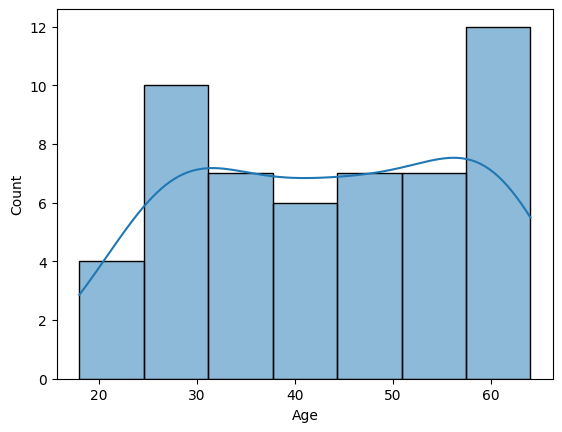

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(customer_data['Age'].dropna(), kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
customer_data['Age'].fillna(customer_data['Age'].median(), inplace=True)
customer_data.isnull().sum()

/tmp/ipython-input-3946487551.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Age'].fillna(customer_data['Age'].median(), inplace=True)


,0
Customer ID,1
First Name,0
Last Name,0
Address,0
Gender,0
Age,0
Email ids,0
Full_name,0


In [ ]:
customer_data=customer_data.dropna(subset=['Customer ID'])
customer_data.isnull().sum()


,0
Customer ID,0
First Name,0
Last Name,0
Address,0
Gender,0
Age,0
Email ids,0
Full_name,0


Pre - Processing for Purchase Information

In [ ]:
purchase_data = pd.read_excel('purchase_infor.xlsx')
purchase_data.head()

,Transaction Date,Transaction ID,Customer ID,Product ID,Discount Code,Amount
0,2025-05-01 00:00:00,TR101,AB1234,1001,ABCDEF,340.0
1,2025-05-01 00:00:00,TR101,AB1234,1011,ABCDEF,680.0
2,2025-06-01 00:00:00,TR102,CD5678,1002,.,400.0
3,2025-10-01 00:00:00,TR103,EF9012,1004,GHIJKL,450.0
4,2025-10-01 00:00:00,TR103,EF9012,1005,GHIJKL,450.0


In [ ]:
purchase_data['Customer ID'].nunique()

22

In [ ]:
purchase_data.isnull().sum()

,0
Transaction Date,0
Transaction ID,0
Customer ID,0
Product ID,0
Discount Code,0
Amount,0


In [ ]:
purchase_data['Transaction Date']=pd.to_datetime(purchase_data['Transaction Date'],errors='coerce')
purchase_data.head()

,Transaction Date,Transaction ID,Customer ID,Product ID,Discount Code,Amount
0,2025-05-01,TR101,AB1234,1001,ABCDEF,340.0
1,2025-05-01,TR101,AB1234,1011,ABCDEF,680.0
2,2025-06-01,TR102,CD5678,1002,.,400.0
3,2025-10-01,TR103,EF9012,1004,GHIJKL,450.0
4,2025-10-01,TR103,EF9012,1005,GHIJKL,450.0


In [ ]:
purchase_data['Discount Code']=purchase_data['Discount Code'].replace(".","No discount")
purchase_data.head()

,Transaction Date,Transaction ID,Customer ID,Product ID,Discount Code,Amount
0,2025-05-01,TR101,AB1234,1001,ABCDEF,340.0
1,2025-05-01,TR101,AB1234,1011,ABCDEF,680.0
2,2025-06-01,TR102,CD5678,1002,No discount,400.0
3,2025-10-01,TR103,EF9012,1004,GHIJKL,450.0
4,2025-10-01,TR103,EF9012,1005,GHIJKL,450.0


In [ ]:
purchase_data['Transaction ID'].value_counts()

,count
Transaction ID,
TR115,3
TR111,3
TR106,2
TR105,2
TR101,2
TR103,2
TR121,2
TR122,2
TR112,2


In [ ]:
purchase_data['Amount'].describe()

,Amount
count,40.000000
mean,569.250000
std,180.275964
min,255.000000
25%,443.750000
50%,510.000000
75%,765.000000
max,900.000000


In [ ]:
purchase_data["Discount_Flag"] = purchase_data["Discount Code"].apply(
    lambda x: "Discount" if x != "No Discount" else "No Discount"
)
purchase_data[purchase_data["Discount_Flag"] == "Discount"]["Customer ID"].nunique()


22

In [ ]:
purchase_data["Discount Code"].value_counts()


,count
Discount Code,
No discount,11
QAZWSX,3
GHIJKL,2
ABCDEF,2
STUVWX,2
YZABCD,2
KLMNOP,2
MNOPQR,2
PLMNKO,2


In [ ]:
purchase_data["Discount_Flag"].value_counts()


,count
Discount_Flag,
Discount,40


In [ ]:
purchase_data["Discount_Flag"] = np.where(
    purchase_data["Discount Code"].str.lower() == "no discount",
    "No Discount",
    "Discount"
)
purchase_data.head()

,Transaction Date,Transaction ID,Customer ID,Product ID,Discount Code,Amount,Discount_Flag
0,2025-05-01,TR101,AB1234,1001,ABCDEF,340.0,Discount
1,2025-05-01,TR101,AB1234,1011,ABCDEF,680.0,Discount
2,2025-06-01,TR102,CD5678,1002,No discount,400.0,No Discount
3,2025-10-01,TR103,EF9012,1004,GHIJKL,450.0,Discount
4,2025-10-01,TR103,EF9012,1005,GHIJKL,450.0,Discount


In [ ]:
purchase_data["Discount_Flag"].value_counts()

,count
Discount_Flag,
Discount,29
No Discount,11


In [ ]:
purchase_data[purchase_data["Discount_Flag"]=="No Discount"]["Customer ID"].nunique()


7

In [ ]:
purchase_data[purchase_data["Discount_Flag"]=="Discount"]["Customer ID"].nunique()


15

In [ ]:
purchase_data.groupby("Discount_Flag")["Amount"].sum()

,Amount
Discount_Flag,
Discount,16570.0
No Discount,6200.0


In [ ]:
purchase_data['Amount'].sum()

np.float64(22770.0)

In [ ]:
discount_sales=purchase_data[purchase_data["Discount_Flag"]=="Discount"] \
    .groupby("Discount Code")["Amount"].sum() \
    .sort_values(ascending=False)
discount_sales

,Amount
Discount Code,
ASDFGH,1530.0
TGBYHN,1530.0
ZXCVBN,1530.0
MNOPQR,1280.0
KLMNOP,1275.0
UJMKIH,1230.0
EDCRFV,1145.0
YZABCD,1080.0
ABCDEF,1020.0


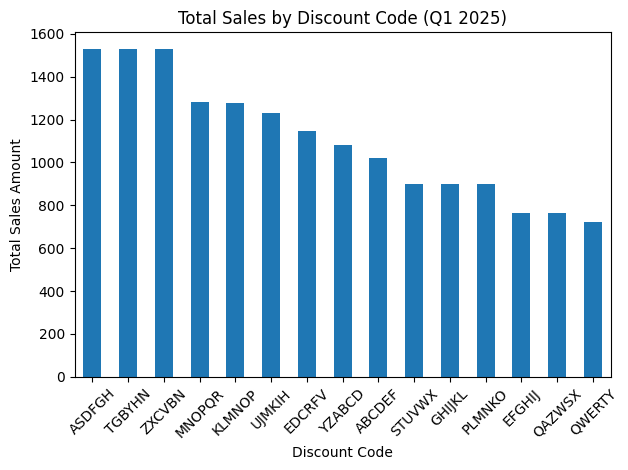

In [ ]:
import matplotlib.pyplot as plt

discount_sales.plot(kind="bar")
plt.xlabel("Discount Code")
plt.ylabel("Total Sales Amount")
plt.title("Total Sales by Discount Code (Q1 2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
purchase_data[purchase_data["Discount_Flag"]=="Discount"]["Customer ID"].nunique()


15

product data

In [ ]:
product_data=pd.read_excel('Product_Information.xlsx')
product_data.head()

,Product ID,Product Name,Colour,Price(INR)
0,1001,shirt (men),Red,400
1,1002,shirt (men),Blue,400
2,1003,shirt (men),Green,400
3,1004,t-shirt (women),Black,500
4,1005,t-shirt (women),White,500


In [ ]:
sales_product = purchase_data.merge(product_data, on="Product ID", how="left")


In [ ]:
sales_product["Category"] = sales_product["Product Name"].str.extract(r'(shirt|t-shirt|trousers|half-pants|skirt)', expand=False)
sales_product.groupby("Category")["Amount"].sum().sort_values(ascending=False)


,Amount
Category,
skirt,7020.0
trousers,5720.0
t-shirt,4185.0
shirt,3400.0
half-pants,765.0


<Axes: xlabel='Category'>

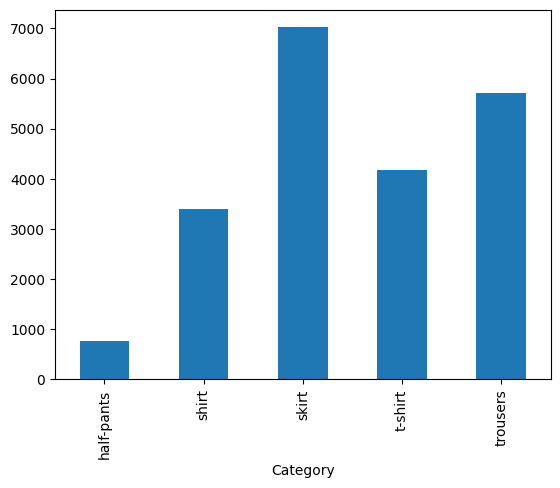

In [ ]:
sales_product.groupby("Category")["Amount"].sum().plot(kind="bar")


In [ ]:
sales_product["Gender"] = sales_product["Product Name"].str.extract(r'\((men|women)\)')
sales_product.groupby("Gender")["Amount"].sum()


,Amount
Gender,
men,7700.0
women,15070.0


In [ ]:
discount_data = pd.read_excel("Discount_Information.xlsx")
discount_data["Discount Code"] = discount_data["Discount Code"].str.strip()


In [ ]:
discount_data["Email Ids"].nunique()


36

In [ ]:
converted_customers = discount_data.merge(
    purchase_data[["Customer ID", "Discount Code"]].drop_duplicates(),
    on="Discount Code",
    how="inner"
)

converted_customers["Customer ID"].nunique()


15

In [ ]:
print(city_counts)

Address
jaipur       9
kolkata      8
bangalore    7
mumbai       6
hyderabad    6
surat        5
chennai      5
delhi        4
ahmedabad    4
pune         1
Name: count, dtype: int64


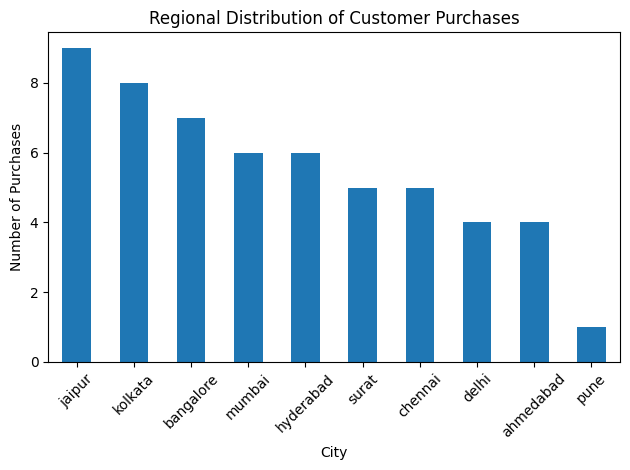

In [ ]:
city_counts.sort_values(ascending=False).plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Number of Purchases")
plt.title("Regional Distribution of Customer Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
discount_data.head()

,Email Ids,Email Date,Discount Code,Discount percentage
0,aarav88@example.com,2024-12-25,ABCDEF,0.15
1,vihaan25@example.com,2024-12-26,GHIJKL,0.10
2,myra75@example.com,2024-12-27,MNOPQR,0.20
3,patel90@example.com,2024-12-28,STUVWX,0.10
4,ira33@example.com,2024-12-29,YZABCD,0.15


In [ ]:
discount_data['Email Ids'].nunique()

36

In [ ]:
discount_data.shape

(36, 4)

In [ ]:
customer_data.rename(columns={'Email ids': 'Email Ids'}, inplace=True)
customer_data.head()

,Customer ID,First Name,Last Name,Address,Gender,Age,Email Ids,Full_name
0,ED9336,Ira,Chopra,mumbai,Female,29.0,ira901@example.com,Ira Chopra
1,MV8927,Aditya,Iyer,delhi,Male,57.0,aditya518@example.com,Aditya Iyer
2,LX6917,Saanvi,Reddy,bangalore,Female,42.0,saanvi372@example.com,Saanvi Reddy
3,VU7300,Ira,Reddy,hyderabad,Female,64.0,ira431@example.com,Ira Reddy
4,NR2536,Saanvi,Mehra,ahmedabad,Female,63.0,mehra743@example.com,Saanvi Mehra


In [ ]:
email_customers = discount_data.merge(customer_data,on='Email Ids',how='left')
email_customers.shape


(36, 11)

In [ ]:
non_email_customers = customer_data[~customer_data["Email Ids"].isin(discount_data["Email Ids"])]
non_email_customers.head(15)

,Customer ID,First Name,Last Name,Address,Gender,Age,Email Ids,Full_name
0,ED9336,Ira,Chopra,mumbai,Female,29.0,ira901@example.com,Ira Chopra
1,MV8927,Aditya,Iyer,delhi,Male,57.0,aditya518@example.com,Aditya Iyer
2,LX6917,Saanvi,Reddy,bangalore,Female,42.0,saanvi372@example.com,Saanvi Reddy
3,VU7300,Ira,Reddy,hyderabad,Female,64.0,ira431@example.com,Ira Reddy
4,NR2536,Saanvi,Mehra,ahmedabad,Female,63.0,mehra743@example.com,Saanvi Mehra
5,MP5315,Ira,Nair,jaipur,Female,55.0,ira638@example.com,Ira Nair
6,NV2388,Krishna,Chopra,delhi,Male,28.0,krishna656@example.com,Krishna Chopra
7,SF0140,Aditya,Kapoor,bangalore,Male,26.0,kapoor65@example.com,Aditya Kapoor
8,KV2674,Vivaan,Sharma,jaipur,Male,62.0,sharma70@example.com,Vivaan Sharma
9,YU0168,Myra,Nair,kolkata,Female,60.0,myra471@example.com,Myra Nair


In [ ]:
purchase_data[purchase_data["Discount_Flag"]=="Discount"]["Customer ID"].nunique()

15

In [ ]:
purchase_data[purchase_data["Discount_Flag"]=="No Discount"]["Customer ID"].nunique()


7

,count
Address,


In [ ]:
print(city_counts)

Address
jaipur       9
kolkata      8
bangalore    7
mumbai       6
hyderabad    6
surat        5
chennai      5
delhi        4
ahmedabad    4
pune         1
Name: count, dtype: int64


In [ ]:
from google.colab import files
customer_data.to_csv('customer_data_clean.csv', index=False)
files.download('customer_data_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
customer_spend = purchase_data.groupby("Customer ID")["Amount"].sum()
customer_spend.head()


,Amount
Customer ID,
AB1234,1020.0
BA6789,900.0
CD5678,400.0
DC1234,765.0
EF5678,500.0


In [ ]:
purchase_data['Amount'].sum()

np.float64(22770.0)

In [ ]:
customer_spend.mean()


np.float64(1035.0)

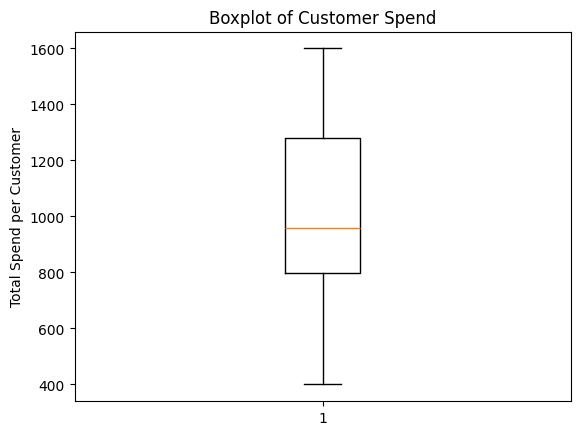

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(customer_spend)
plt.title("Boxplot of Customer Spend")
plt.ylabel("Total Spend per Customer")
plt.show()


In [ ]:
sales_product = purchase_data.merge(product_data, on="Product ID", how="left")
sales_product["Category"] = sales_product["Product Name"].str.extract(
    r'(shirt|t-shirt|trousers|half-pants|skirt)', expand=False
)
category_sales = sales_product.groupby("Category")["Amount"].sum().sort_values(ascending=False)
category_sales


,Amount
Category,
skirt,7020.0
trousers,5720.0
t-shirt,4185.0
shirt,3400.0
half-pants,765.0


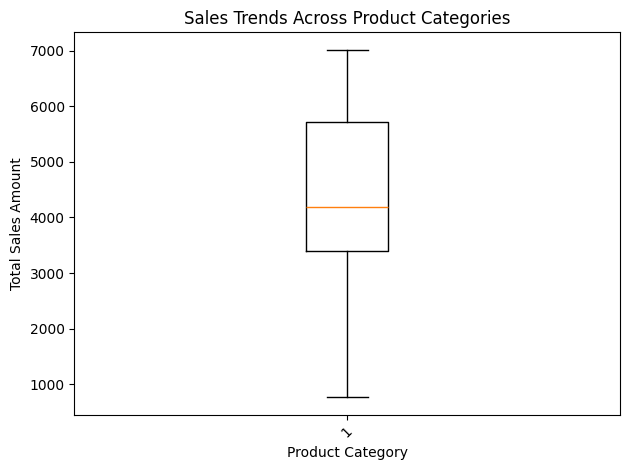

In [ ]:
plt.boxplot(category_sales)
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.title("Sales Trends Across Product Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
product_data.head()

,Product ID,Product Name,Colour,Price(INR)
0,1001,shirt (men),Red,400
1,1002,shirt (men),Blue,400
2,1003,shirt (men),Green,400
3,1004,t-shirt (women),Black,500
4,1005,t-shirt (women),White,500


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

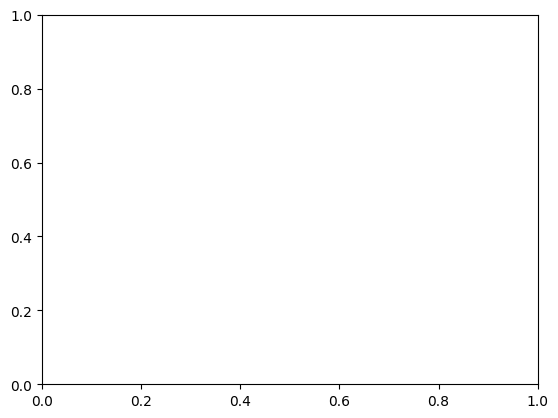

In [ ]:
plt.boxplot(product_data["Price(INR)"])
plt.title("Boxplot of Product Prices")
plt.ylabel("Price")
plt.show()


In [ ]:
product_data["Category"] = product_data["Product Name"].str.extract(
    r'(shirt|t-shirt|trousers|half-pants|skirt)', expand=False
)



In [ ]:
product_data['Price(INR)'].dtype

dtype('O')

In [ ]:
product_data["Price(INR)"] = pd.to_numeric(product_data["Price(INR)"], errors="coerce")


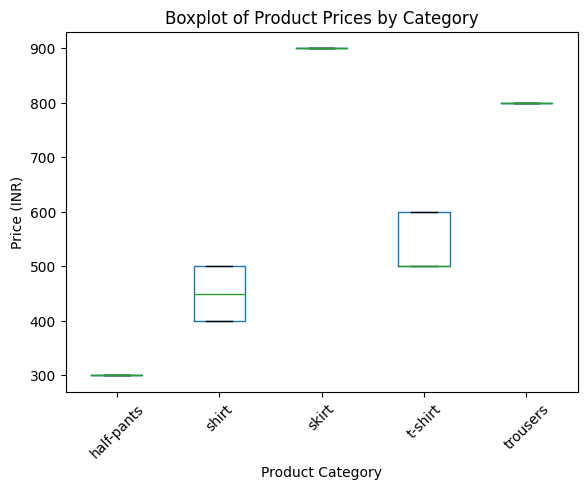

In [ ]:
product_data.boxplot(
    column="Price(INR)",
    by="Category",
    grid=False
)

plt.title("Boxplot of Product Prices by Category")
plt.suptitle("")
plt.xlabel("Product Category")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.show()


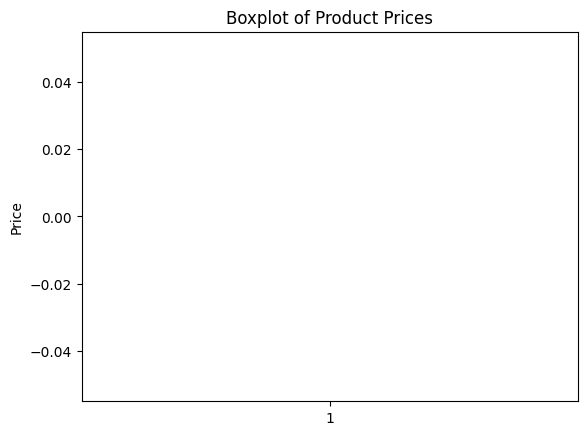

In [ ]:
plt.boxplot(product_data["Price(INR)"])
plt.title("Boxplot of Product Prices")
plt.ylabel("Price")
plt.show()


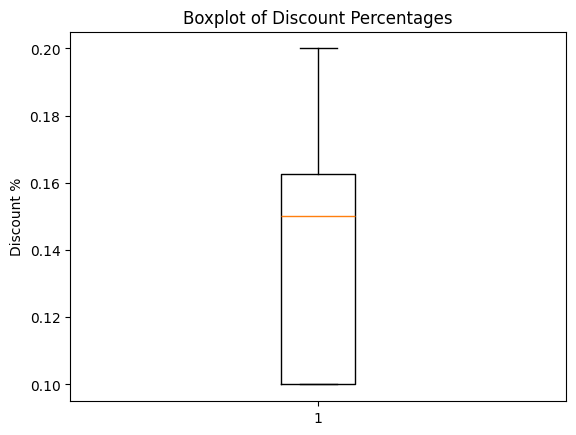

In [ ]:
plt.boxplot(discount_data["Discount percentage"].dropna())
plt.title("Boxplot of Discount Percentages")
plt.ylabel("Discount %")
plt.show()


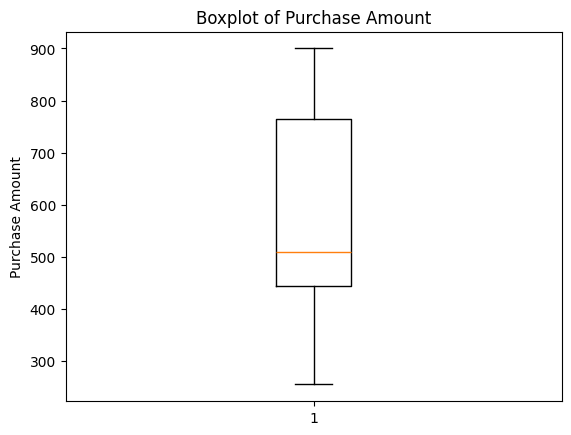

In [ ]:
plt.boxplot(purchase_data["Amount"])
plt.title("Boxplot of Purchase Amount")
plt.ylabel("Purchase Amount")
plt.show()



In [ ]:
discount_amount = purchase_data.merge(
    discount_data[["Discount Code", "Discount percentage"]],
    on="Discount Code",
    how="left"
)
discount_amount[["Discount percentage", "Amount"]].corr()


,Discount percentage,Amount
Discount percentage,1.000000,0.036354
Amount,0.036354,1.000000


In [ ]:
qty_price = purchase_data.merge(
    product_data[["Product ID", "Price(INR)"]],
    on="Product ID",
    how="left"
)
qty_price[["Quantity", "Price(INR)"]].corr()


KeyError: "['Quantity'] not in index"